In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_classification = pd.read_csv("fear_greed_index.csv")

In [3]:
df_historical = pd.read_csv("historical_data.csv")

In [4]:
print(df_classification.head())

    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05


In [5]:
print(df_historical.head())

                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec0945

**Analysing the df_Classification dataframe**

In [6]:
print("Shape of the Classification dataframe: ",df_classification.shape)

Shape of the Classification dataframe:  (2644, 4)


In [7]:
print(df_classification.isnull().sum())

timestamp         0
value             0
classification    0
date              0
dtype: int64


In [8]:
print(df_classification["classification"].unique())

['Fear' 'Extreme Fear' 'Neutral' 'Greed' 'Extreme Greed']


In [9]:
## Range of values for the multiple sentiment classifications
#Fear
print("Min Value - Fear:", df_classification[df_classification["classification"] == "Fear"]["value"].min())
print("Max Value - Fear:", df_classification[df_classification["classification"] == "Fear"]["value"].max())

#Extreme Fear
print("Min Value - Extreme Fear:", df_classification[df_classification["classification"] == "Extreme Fear"]["value"].min())
print("Max Value - Extreme Fear:", df_classification[df_classification["classification"] == "Extreme Fear"]["value"].max())

#Neutral
print("Min Value - Neutral:", df_classification[df_classification["classification"] == "Neutral"]["value"].min())
print("Max Value - Neutral:", df_classification[df_classification["classification"] == "Neutral"]["value"].max())

#Greed
print("Min Value - Greed:", df_classification[df_classification["classification"] == "Greed"]["value"].min())
print("Max Value - Greed:", df_classification[df_classification["classification"] == "Greed"]["value"].max())

#Extreme Greed
print("Min Value - Extremely Greed:", df_classification[df_classification["classification"] == "Extreme Greed"]["value"].min())
print("Max Value - Extremely Greed:", df_classification[df_classification["classification"] == "Extreme Greed"]["value"].max())


Min Value - Fear: 25
Max Value - Fear: 44
Min Value - Extreme Fear: 5
Max Value - Extreme Fear: 24
Min Value - Neutral: 45
Max Value - Neutral: 54
Min Value - Greed: 55
Max Value - Greed: 74
Min Value - Extremely Greed: 75
Max Value - Extremely Greed: 95


In [10]:
print(df_classification.columns)

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


 **Analysing the df_historical dataframe**

In [11]:
print("Shape of the historical dataframe: ",df_historical.shape)

Shape of the historical dataframe:  (211224, 16)


In [12]:
print(df_historical.isnull().sum())

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


In [13]:
print(df_historical["Account"].nunique())

32


**There are 32 traders**

In [14]:
print(df_historical["Coin"].nunique())

246


In [15]:
print(df_historical["Coin"].unique())

['@107' 'AAVE' 'DYDX' 'AIXBT' 'GMX' 'EIGEN' 'HYPE' 'SOL' 'SUI' 'DOGE'
 'ETH' 'kPEPE' 'TRUMP' 'ONDO' 'ENA' 'LINK' 'XRP' 'S' 'BNB' 'BERA' 'WIF'
 'LAYER' 'MKR' 'KAITO' 'IP' 'JUP' 'USUAL' 'ADA' 'BTC' 'PURR/USDC' 'ZRO'
 '@7' '@19' '@21' '@44' '@48' '@11' '@15' '@46' '@61' '@28' '@45' '@9'
 '@41' '@38' 'kSHIB' 'GRASS' 'TAO' 'AVAX' '@2' '@6' '@8' '@10' '@12' '@16'
 '@17' '@35' '@26' '@24' '@32' '@29' '@31' '@33' '@34' '@36' '@37' '@47'
 '@53' '@74' 'RUNE' 'CANTO' 'NTRN' 'BLUR' 'ZETA' 'MINA' 'MANTA' 'RNDR'
 'WLD' 'kBONK' 'ALT' 'INJ' 'STG' 'ZEN' 'MAVIA' 'PIXEL' 'ILV' 'FET' 'STRK'
 'CAKE' 'STX' 'ACE' 'PENDLE' 'AR' 'XAI' 'APE' 'MEME' 'NEAR' 'SEI' 'FTM'
 'MYRO' 'BIGTIME' 'IMX' 'BADGER' 'POLYX' 'OP' 'TNSR' 'MAV' 'TIA' 'MERL'
 'TON' 'PURR' 'ME' 'CRV' 'BRETT' 'CHILLGUY' 'MOODENG' 'VIRTUAL' 'COMP'
 'FARTCOIN' 'AI16Z' 'GRIFFAIN' 'ZEREBRO' 'SPX' 'MELANIA' 'PENGU' 'JELLY'
 'VVV' 'VINE' 'TST' 'ARK' 'YGG' 'POPCAT' 'NIL' 'MOVE' 'BABY' 'RENDER'
 'PROMPT' 'WCT' 'OGN' 'HYPER' 'ZORA' 'BIO' 'INIT' 'TURBO' 'ARB' 

In [16]:
print(df_historical.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [17]:
print(df_historical["Side"].unique())

['BUY' 'SELL']


In [18]:
print(df_historical["Direction"].unique())

['Buy' 'Sell' 'Open Long' 'Close Long' 'Spot Dust Conversion' 'Open Short'
 'Close Short' 'Long > Short' 'Short > Long' 'Auto-Deleveraging'
 'Liquidated Isolated Short' 'Settlement']


In [54]:
# Standard analysis for each direction type
directions = df_historical["Direction"].unique()

for direction in directions:
    # Total occurrences
    total = df_historical[df_historical["Direction"] == direction].shape[0]
    
    # Count SELL-side transactions (where applicable)
    sell_count = df_historical[(df_historical["Direction"] == direction) & 
                             (df_historical["Side"] == "SELL")].shape[0]
    
    # Profitability analysis
    profitable = df_historical[(df_historical["Direction"] == direction) &
                             (df_historical["Closed PnL"] > 0)].shape[0]
    
    print(f"\n--- {direction} ---")
    print(f"Total trades: {total}")
    print(f"SELL-side executions: {sell_count}")
    print(f"Profitable trades: {profitable} ({profitable/total*100:.1f}%)")
    
    # Additional: Average PnL for this direction
    avg_pnl = df_historical[df_historical["Direction"] == direction]["Closed PnL"].sum()
    print(f"Sum of  PnL: ${avg_pnl:.2f}")


--- Buy ---
Total trades: 16716
SELL-side executions: 0
Profitable trades: 0 (0.0%)
Sum of  PnL: $0.00

--- Sell ---
Total trades: 19902
SELL-side executions: 19902
Profitable trades: 16005 (80.4%)
Sum of  PnL: $2906748.42

--- Open Long ---
Total trades: 49895
SELL-side executions: 0
Profitable trades: 0 (0.0%)
Sum of  PnL: $0.00

--- Close Long ---
Total trades: 48678
SELL-side executions: 48678
Profitable trades: 42686 (87.7%)
Sum of  PnL: $3622929.39

--- Spot Dust Conversion ---
Total trades: 142
SELL-side executions: 142
Profitable trades: 0 (0.0%)
Sum of  PnL: $0.00

--- Open Short ---
Total trades: 39741
SELL-side executions: 39741
Profitable trades: 0 (0.0%)
Sum of  PnL: $0.00

--- Close Short ---
Total trades: 36013
SELL-side executions: 0
Profitable trades: 28068 (77.9%)
Sum of  PnL: $3709800.10

--- Long > Short ---
Total trades: 57
SELL-side executions: 57
Profitable trades: 41 (71.9%)
Sum of  PnL: $1991.38

--- Short > Long ---
Total trades: 70
SELL-side executions: 0
Pr

**Understanding the Directional terms**

**Buy** - Standard market/limit buy order    

**Sell** - Standard market/limit sell order  

**Open Long** - Initiating a new long position (All BUY side directions)  

**Close Long** - Exiting a long position (Selling to take profits/losses).  

**Open Short** - Initiating a new short position(selling to bet on price falling).  

**Close Short** -Exiting a short position (buying back to cover).  


**Questions to explore**<br>
1. Do traders perform better in **Fear** or **Greed** markets?
2. Are there more aggressive trades(Open Long/Open Short) during extreme sentiment?
3. Do traders profit by buying in Extreme Fear or selling in Extreme Greed?

**Merging Datasets using time stamps**

In [20]:
# Step 1: Convert 'Timestamp IST' to datetime and extract date
df_historical["Trade_Date"] = pd.to_datetime(df_historical['Timestamp IST'],
                                             format='%d-%m-%Y %H:%M').dt.date

# Step 2: Convert 'date' in df_classification to datetime date
df_classification['date'] = pd.to_datetime(df_classification['date']).dt.date

 
# Step 3: Merge the dataframes on date
merged_df = pd.merge(
    df_historical,
    df_classification,
    left_on='Trade_Date',
    right_on='date',
    how='left'  # Use 'inner' if you only want matching dates
)

In [52]:
print(merged_df.head())

                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL  ...     Order ID  Crossed       Fee      Trade ID  \
0         0.0  ...  52017706630     

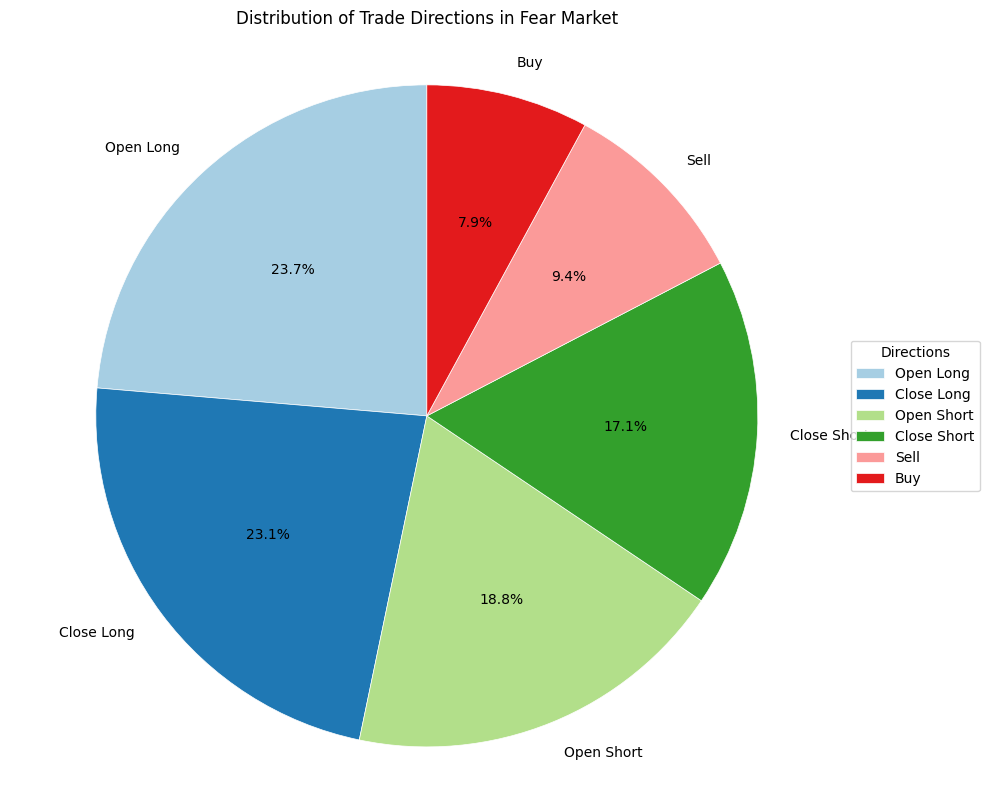

In [22]:
direction_counts = merged_df["Direction"].value_counts()
significant_directions = direction_counts[direction_counts > 150]  # Exclude rare directions

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    significant_directions,
    labels=significant_directions.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,  # Color scheme
    wedgeprops={'edgecolor': 'white', 'linewidth': 0.5}  # Clean edges
)

# Add title and legend
plt.title('Distribution of Trade Directions in Fear Market', pad=20)
plt.legend(
    title="Directions",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

# Equal aspect ratio ensures the pie is circular
plt.axis('equal')  
plt.tight_layout()
plt.show()

**What do most traders do in different sentiments of the market?**

**Analysing the Fear sentiment**

In [23]:
df_fear = merged_df[merged_df["classification"]== "Fear"]

In [24]:
print("Percentage of traders earning profit in the Fear sentiment:")
print((df_fear[df_fear["Closed PnL"]>0].shape[0])/(df_fear.shape[0]))

Percentage of traders earning profit in the Fear sentiment:
0.42076750165758364


In [25]:
list_ = df_fear["Direction"].unique()
print(list_)

['Open Long' 'Close Long' 'Open Short' 'Close Short' 'Long > Short'
 'Short > Long' 'Spot Dust Conversion' 'Buy' 'Sell']


C:\Users\Saya Sai Chandana\AppData\Local\Temp\ipykernel_18596\2434425590.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=direction_counts_fear.index,


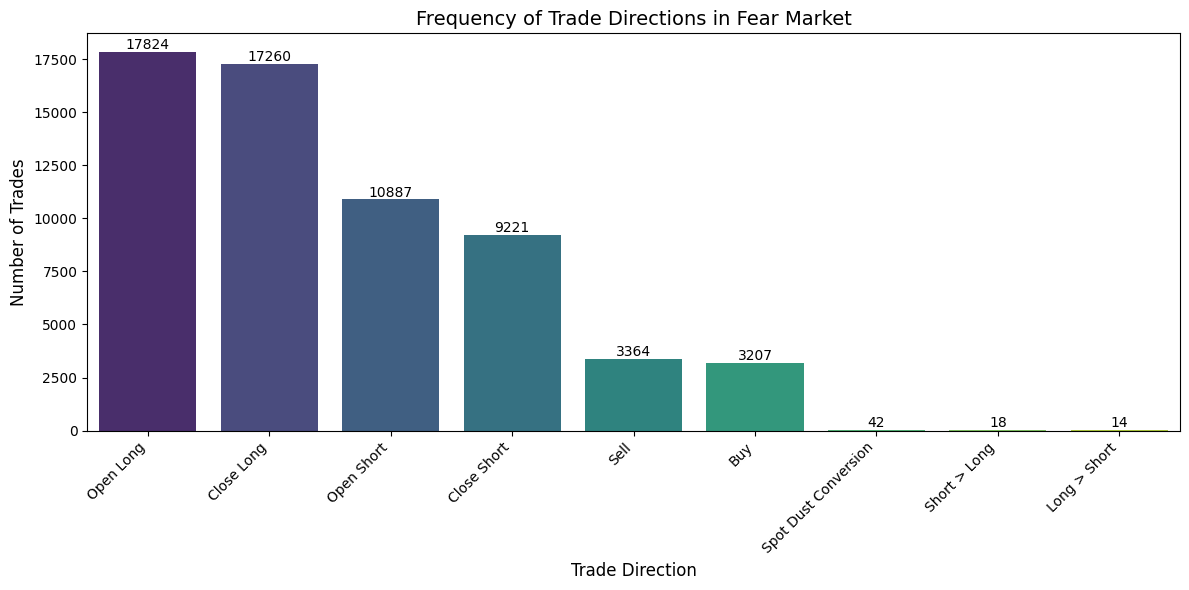

In [26]:
# Get unique directions and their counts
direction_counts_fear = df_fear['Direction'].value_counts()

# Create bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=direction_counts_fear.index, 
                 y=direction_counts_fear.values,
                 palette="viridis")

# Customize plot
plt.title('Frequency of Trade Directions in Fear Market', fontsize=14)
plt.xlabel('Trade Direction', fontsize=12)
plt.ylabel('Number of Trades', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add value labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()

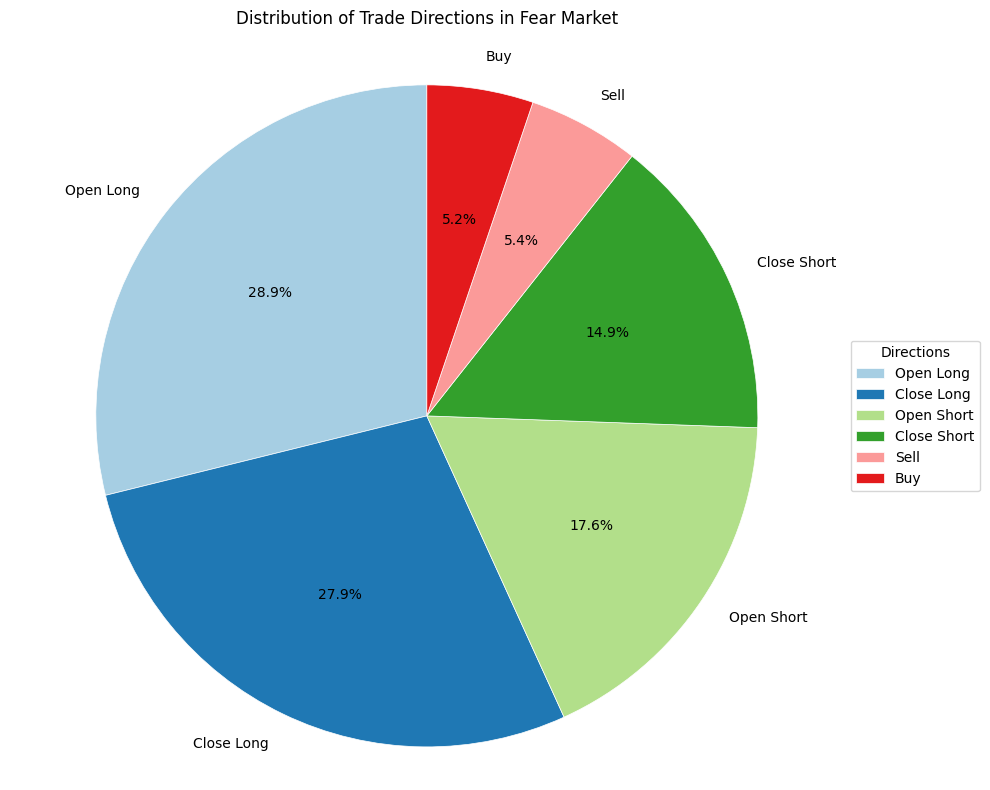

In [27]:
direction_counts = df_fear["Direction"].value_counts()
significant_directions = direction_counts[direction_counts > 150]  # Exclude rare directions

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    significant_directions,
    labels=significant_directions.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,  # Color scheme
    wedgeprops={'edgecolor': 'white', 'linewidth': 0.5}  # Clean edges
)

# Add title and legend
plt.title('Distribution of Trade Directions in Fear Market', pad=20)
plt.legend(
    title="Directions",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

# Equal aspect ratio ensures the pie is circular
plt.axis('equal')  
plt.tight_layout()
plt.show()

In [72]:
for direction in df_fear["Direction"].unique():
    # Additional: Average PnL for this direction
    sum_pnl = df_fear[df_fear["Direction"] == direction]["Closed PnL"].sum()
    print(f"{direction} --Sum of  PnL: ${sum_pnl:.2f}")

Open Long --Sum of  PnL: $0.00
Close Long --Sum of  PnL: $1432581.92
Open Short --Sum of  PnL: $0.00
Close Short --Sum of  PnL: $1914986.46
Long > Short --Sum of  PnL: $67.14
Short > Long --Sum of  PnL: $20086.98
Spot Dust Conversion --Sum of  PnL: $0.00
Buy --Sum of  PnL: $0.00
Sell --Sum of  PnL: $-10567.05


**Analysing the Extreme Fear sentiment**

In [28]:
df_extreme_fear = merged_df[merged_df["classification"]== "Extreme Fear"]

In [29]:
print("Percentage of traders earning profit in the Extreme Fear sentiment:")
print((df_extreme_fear[df_extreme_fear["Closed PnL"]>0].shape[0])/(df_extreme_fear.shape[0]))

Percentage of traders earning profit in the Extreme Fear sentiment:
0.370607476635514


In [30]:
list_ex_fear = df_fear["Direction"].unique()
print(list_ex_fear)

['Open Long' 'Close Long' 'Open Short' 'Close Short' 'Long > Short'
 'Short > Long' 'Spot Dust Conversion' 'Buy' 'Sell']


C:\Users\Saya Sai Chandana\AppData\Local\Temp\ipykernel_18596\1537279675.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=direction_counts_ex_fear.index,


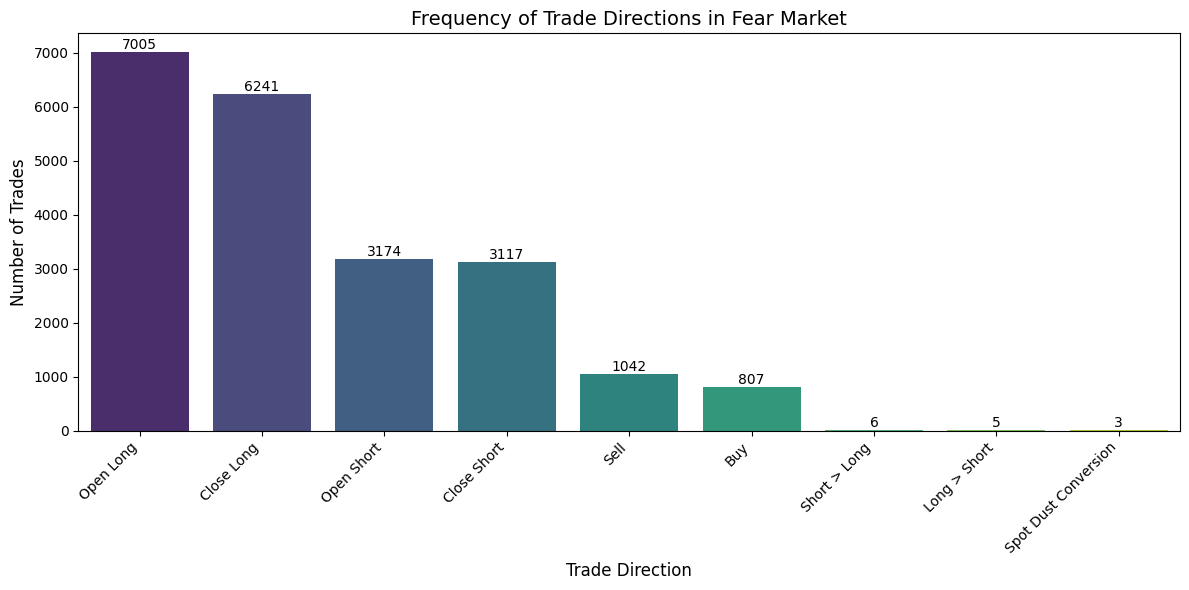

In [31]:
# Get unique directions and their counts
direction_counts_ex_fear= df_extreme_fear['Direction'].value_counts()

# Create bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=direction_counts_ex_fear.index, 
                 y=direction_counts_ex_fear.values,
                 palette="viridis")

# Customize plot
plt.title('Frequency of Trade Directions in Fear Market', fontsize=14)
plt.xlabel('Trade Direction', fontsize=12)
plt.ylabel('Number of Trades', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add value labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()

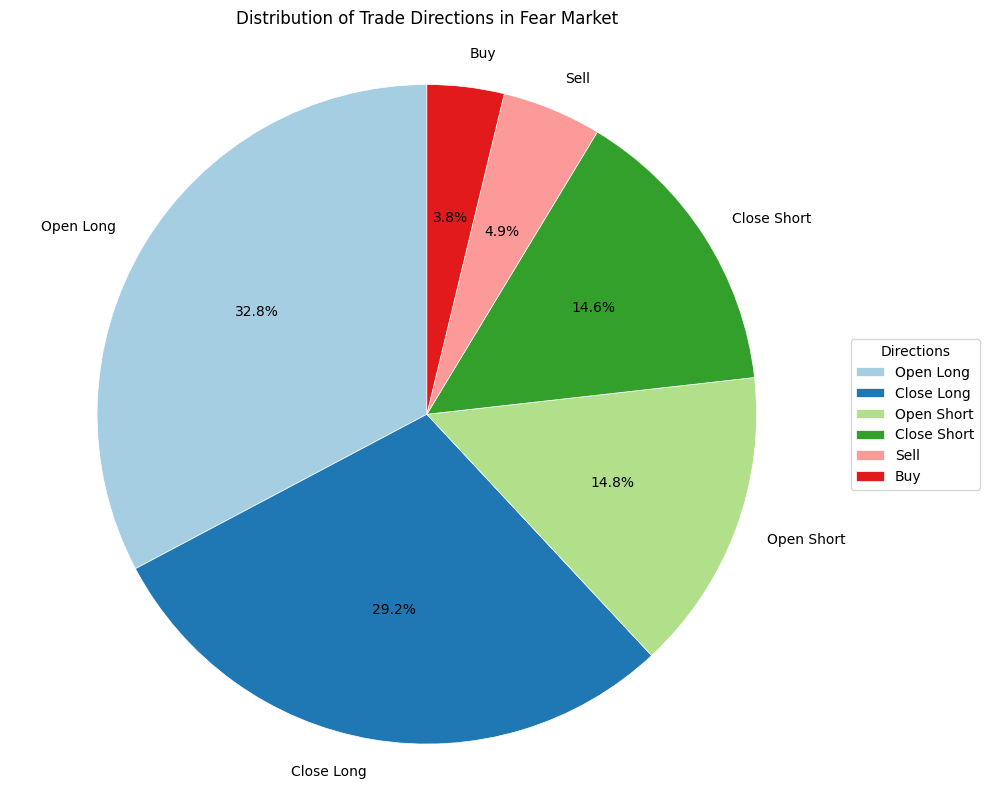

In [32]:
direction_counts = df_extreme_fear["Direction"].value_counts()
significant_directions = direction_counts[direction_counts > 150]  # Exclude rare directions

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    significant_directions,
    labels=significant_directions.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,  # Color scheme
    wedgeprops={'edgecolor': 'white', 'linewidth': 0.5}  # Clean edges
)

# Add title and legend
plt.title('Distribution of Trade Directions in Fear Market', pad=20)
plt.legend(
    title="Directions",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

# Equal aspect ratio ensures the pie is circular
plt.axis('equal')  
plt.tight_layout()
plt.show()

In [74]:
for direction in df_extreme_fear["Direction"].unique():
    sum_pnl = df_extreme_fear[df_extreme_fear["Direction"] == direction]["Closed PnL"].sum()
    print(f"{direction} --Sum of  PnL: ${sum_pnl:.2f}")

Open Long --Sum of  PnL: $0.00
Close Long --Sum of  PnL: $506752.79
Close Short --Sum of  PnL: $384638.54
Open Short --Sum of  PnL: $0.00
Short > Long --Sum of  PnL: $-11595.10
Buy --Sum of  PnL: $0.00
Sell --Sum of  PnL: $-140692.64
Long > Short --Sum of  PnL: $6.66
Spot Dust Conversion --Sum of  PnL: $0.00


**Analysing the Neutral Sentiment**

In [33]:
df_neutral = merged_df[merged_df["classification"]== "Neutral"]

In [34]:
print("Percentage of traders earning profit in the Neutral sentiment:")
print((df_neutral[df_neutral["Closed PnL"]>0].shape[0])/(df_neutral.shape[0]))

Percentage of traders earning profit in the Neutral sentiment:
0.3969909250119408


In [35]:
list_neutral = df_neutral["Direction"].unique()
print(list_neutral)

['Open Short' 'Open Long' 'Close Long' 'Sell' 'Buy' 'Close Short'
 'Spot Dust Conversion' 'Long > Short' 'Short > Long']


C:\Users\Saya Sai Chandana\AppData\Local\Temp\ipykernel_18596\1309419478.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=direction_counts_neutral.index,


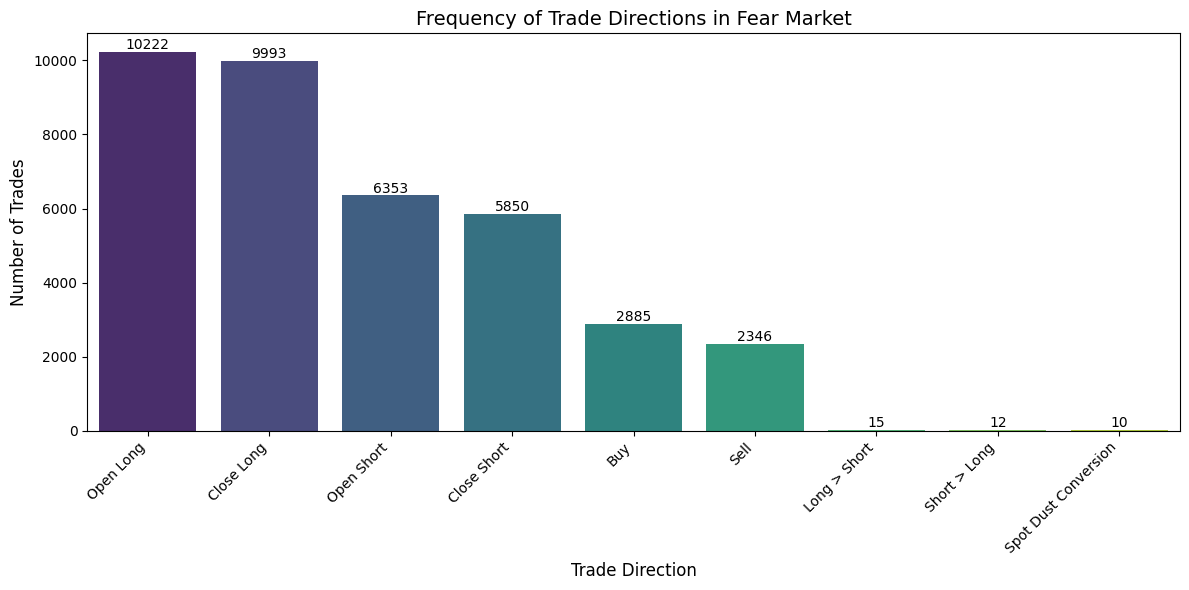

In [36]:
# Get unique directions and their counts
direction_counts_neutral = df_neutral['Direction'].value_counts()

# Create bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=direction_counts_neutral.index, 
                 y=direction_counts_neutral.values,
                 palette="viridis")

# Customize plot
plt.title('Frequency of Trade Directions in Fear Market', fontsize=14)
plt.xlabel('Trade Direction', fontsize=12)
plt.ylabel('Number of Trades', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add value labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()

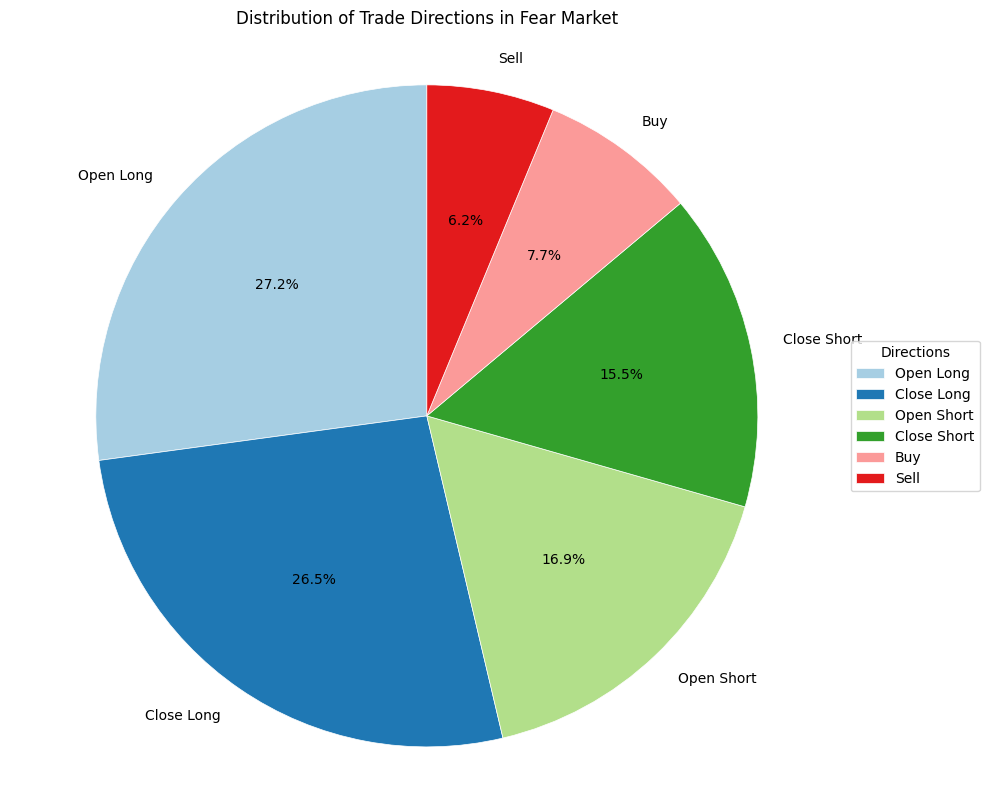

In [37]:
direction_counts = df_neutral["Direction"].value_counts()
significant_directions = direction_counts[direction_counts > 150]  # Exclude rare directions

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    significant_directions,
    labels=significant_directions.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,  # Color scheme
    wedgeprops={'edgecolor': 'white', 'linewidth': 0.5}  # Clean edges
)

# Add title and legend
plt.title('Distribution of Trade Directions in Fear Market', pad=20)
plt.legend(
    title="Directions",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

# Equal aspect ratio ensures the pie is circular
plt.axis('equal')  
plt.tight_layout()
plt.show()

In [75]:
for direction in df_neutral["Direction"].unique():
    sum_pnl = df_neutral[df_neutral["Direction"] == direction]["Closed PnL"].sum()
    print(f"{direction} --Sum of  PnL: ${sum_pnl:.2f}")

Open Short --Sum of  PnL: $0.00
Open Long --Sum of  PnL: $0.00
Close Long --Sum of  PnL: $527788.16
Sell --Sum of  PnL: $210007.44
Buy --Sum of  PnL: $0.00
Close Short --Sum of  PnL: $554558.43
Spot Dust Conversion --Sum of  PnL: $0.00
Long > Short --Sum of  PnL: $709.98
Short > Long --Sum of  PnL: $-143.34


**Analysing the Greed sentiment**

In [38]:
df_greed = merged_df[merged_df["classification"]== "Greed"]

In [39]:
print("Percentage of traders earning profit in the Greed sentiment:")
print((df_greed[df_greed["Closed PnL"]>0].shape[0])/(df_greed.shape[0]))

Percentage of traders earning profit in the Greed sentiment:
0.38482794266743536


In [40]:
list_greed = df_greed["Direction"].unique()
print(list_greed)

['Close Long' 'Open Long' 'Open Short' 'Close Short' 'Buy'
 'Auto-Deleveraging' 'Spot Dust Conversion' 'Long > Short' 'Sell'
 'Short > Long' 'Liquidated Isolated Short' 'Settlement']


C:\Users\Saya Sai Chandana\AppData\Local\Temp\ipykernel_18596\198016261.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=direction_counts_greed.index,


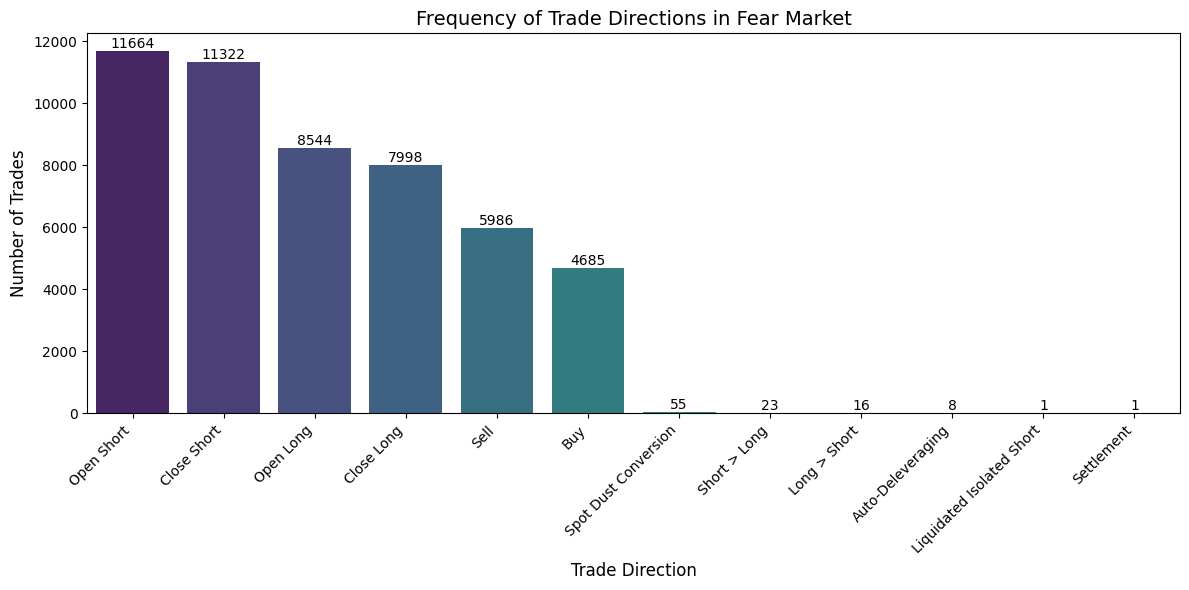

In [41]:
# Get unique directions and their counts
direction_counts_greed = df_greed['Direction'].value_counts()

# Create bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=direction_counts_greed.index, 
                 y=direction_counts_greed.values,
                 palette="viridis")

# Customize plot
plt.title('Frequency of Trade Directions in Fear Market', fontsize=14)
plt.xlabel('Trade Direction', fontsize=12)
plt.ylabel('Number of Trades', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add value labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()

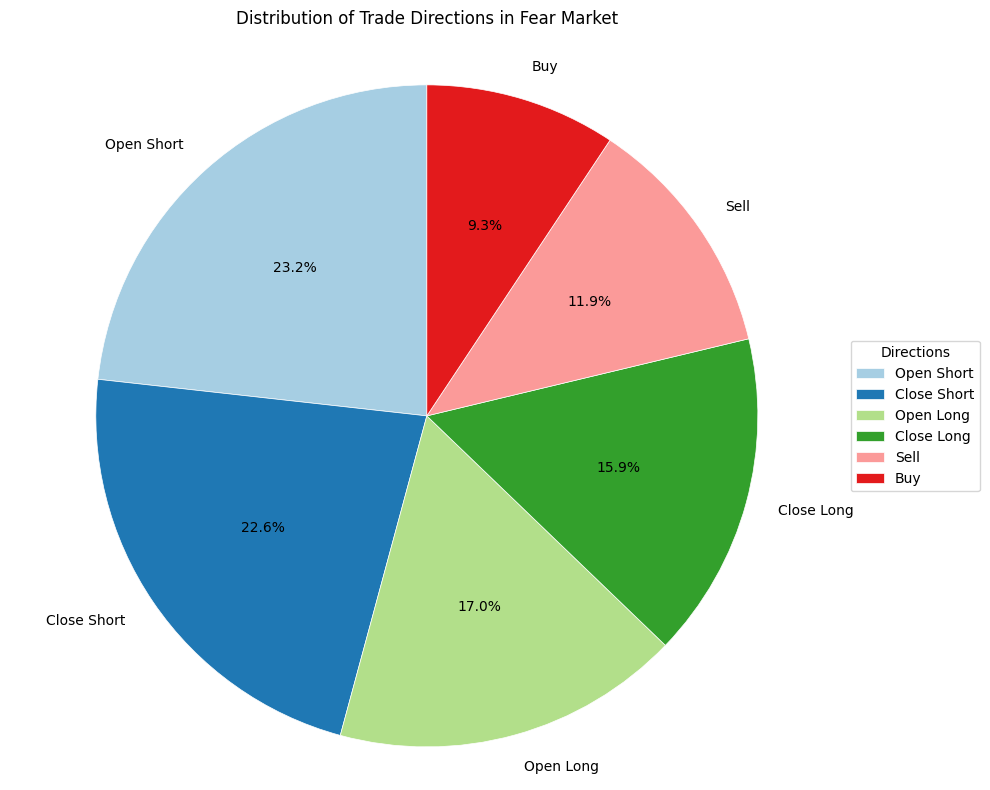

In [42]:
direction_counts = df_greed["Direction"].value_counts()
significant_directions = direction_counts[direction_counts > 150]  # Exclude rare directions

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    significant_directions,
    labels=significant_directions.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,  # Color scheme
    wedgeprops={'edgecolor': 'white', 'linewidth': 0.5}  # Clean edges
)

# Add title and legend
plt.title('Distribution of Trade Directions in Fear Market', pad=20)
plt.legend(
    title="Directions",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

# Equal aspect ratio ensures the pie is circular
plt.axis('equal')  
plt.tight_layout()
plt.show()

In [76]:
for direction in df_greed["Direction"].unique():
    sum_pnl = df_greed[df_greed["Direction"] == direction]["Closed PnL"].sum()
    print(f"{direction} --Sum of  PnL: ${sum_pnl:.2f}")

Close Long --Sum of  PnL: $711490.52
Open Long --Sum of  PnL: $0.00
Open Short --Sum of  PnL: $0.00
Close Short --Sum of  PnL: $624923.40
Buy --Sum of  PnL: $0.00
Auto-Deleveraging --Sum of  PnL: $57478.46
Spot Dust Conversion --Sum of  PnL: $0.00
Long > Short --Sum of  PnL: $363.39
Sell --Sum of  PnL: $766340.32
Short > Long --Sum of  PnL: $2315.31
Liquidated Isolated Short --Sum of  PnL: $-12752.91
Settlement --Sum of  PnL: $-29.22


**Analysing the Extreme Greed sentiment**

In [43]:
df_ex_greed = merged_df[merged_df["classification"]== "Extreme Greed"]

In [44]:
print("Percentage of traders earning profit in the Extreme Greed sentiment:")
print((df_ex_greed[df_ex_greed["Closed PnL"]>0].shape[0])/(df_ex_greed.shape[0]))

Percentage of traders earning profit in the Extreme Greed sentiment:
0.46494298859771954


In [45]:
list_ex_greed = df_ex_greed["Direction"].unique()
print(list_ex_greed)

['Buy' 'Sell' 'Open Long' 'Close Long' 'Spot Dust Conversion' 'Open Short'
 'Close Short' 'Short > Long' 'Long > Short']


C:\Users\Saya Sai Chandana\AppData\Local\Temp\ipykernel_18596\3889045034.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=direction_counts_ex_fear.index,


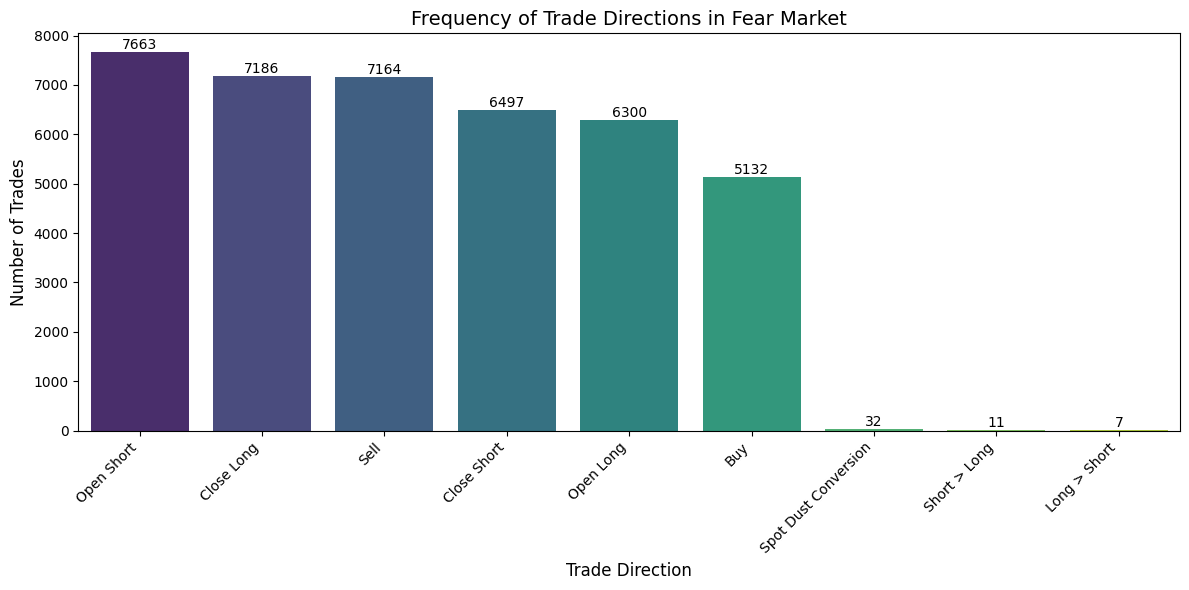

In [46]:
# Get unique directions and their counts
direction_counts_ex_fear = df_ex_greed['Direction'].value_counts()

# Create bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=direction_counts_ex_fear.index, 
                 y=direction_counts_ex_fear.values,
                 palette="viridis")

# Customize plot
plt.title('Frequency of Trade Directions in Fear Market', fontsize=14)
plt.xlabel('Trade Direction', fontsize=12)
plt.ylabel('Number of Trades', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add value labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()

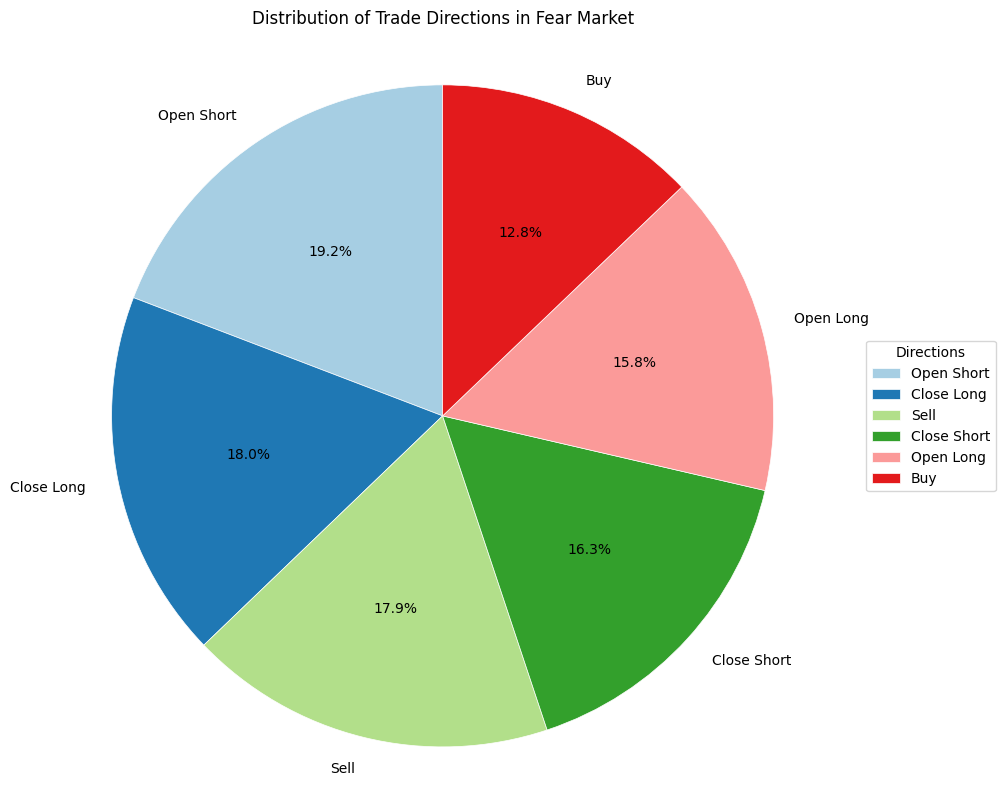

In [47]:
direction_counts = df_ex_greed["Direction"].value_counts()
significant_directions = direction_counts[direction_counts > 150]  # Exclude rare directions

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    significant_directions,
    labels=significant_directions.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,  # Color scheme
    wedgeprops={'edgecolor': 'white', 'linewidth': 0.5}  # Clean edges
)

# Add title and legend
plt.title('Distribution of Trade Directions in Fear Market', pad=20)
plt.legend(
    title="Directions",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

# Equal aspect ratio ensures the pie is circular
plt.axis('equal')  
plt.tight_layout()
plt.show()

In [77]:
for direction in df_ex_greed["Direction"].unique():
    sum_pnl = df_ex_greed[df_ex_greed["Direction"] == direction]["Closed PnL"].sum()
    print(f"{direction} --Sum of  PnL: ${sum_pnl:.2f}")

Buy --Sum of  PnL: $0.00
Sell --Sum of  PnL: $2081660.35
Open Long --Sum of  PnL: $0.00
Close Long --Sum of  PnL: $444316.00
Spot Dust Conversion --Sum of  PnL: $0.00
Open Short --Sum of  PnL: $0.00
Close Short --Sum of  PnL: $188221.27
Short > Long --Sum of  PnL: $129.48
Long > Short --Sum of  PnL: $844.21


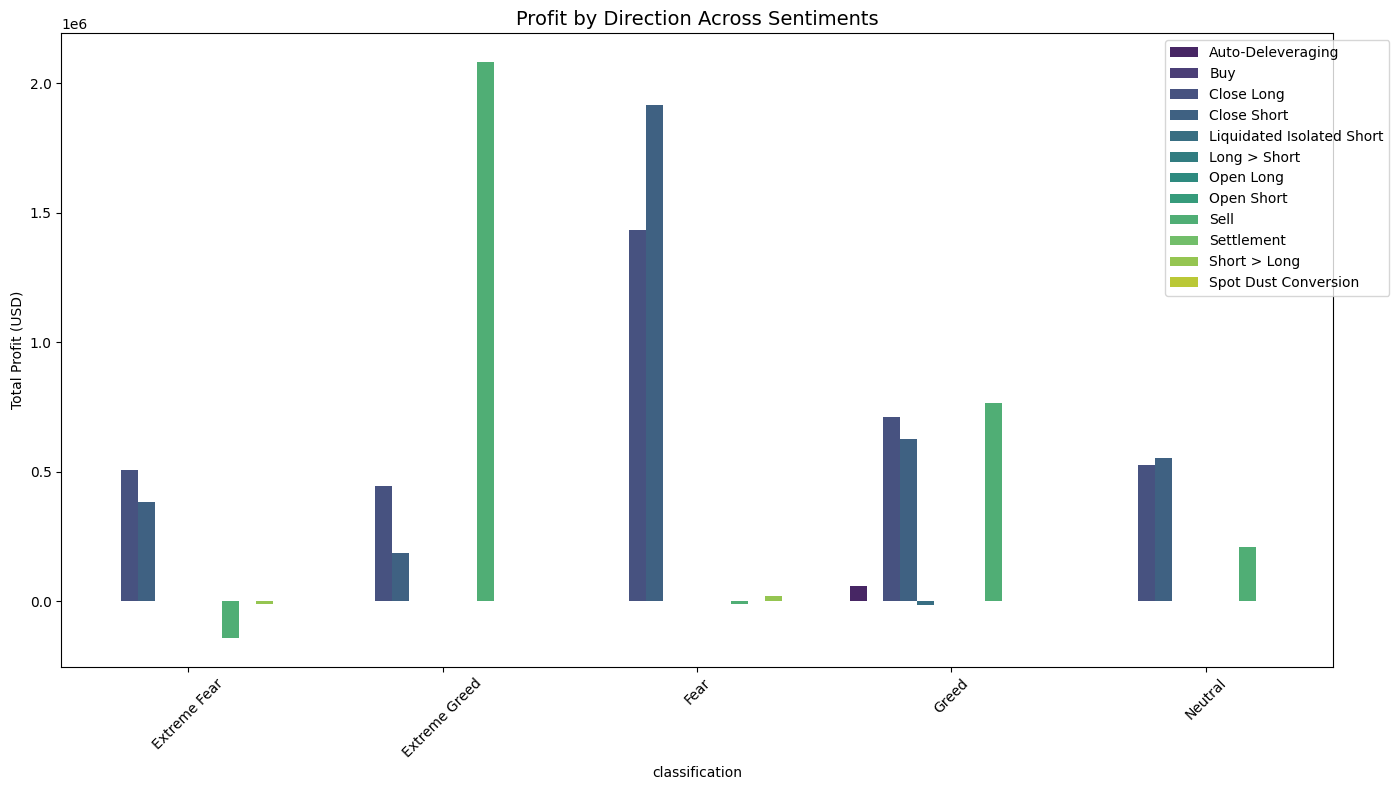

In [91]:
# Prepare profit data by sentiment and direction
profit_matrix = merged_df.groupby(['classification', 'Direction'])['Closed PnL'].sum().unstack()

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(data=profit_matrix.reset_index().melt(id_vars='classification'),
            x='classification',
            y='value',
            hue='Direction',
            palette='viridis')
plt.title('Profit by Direction Across Sentiments', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Total Profit (USD)')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()

Text(120.7222222222222, 0.5, 'Trade Direction')

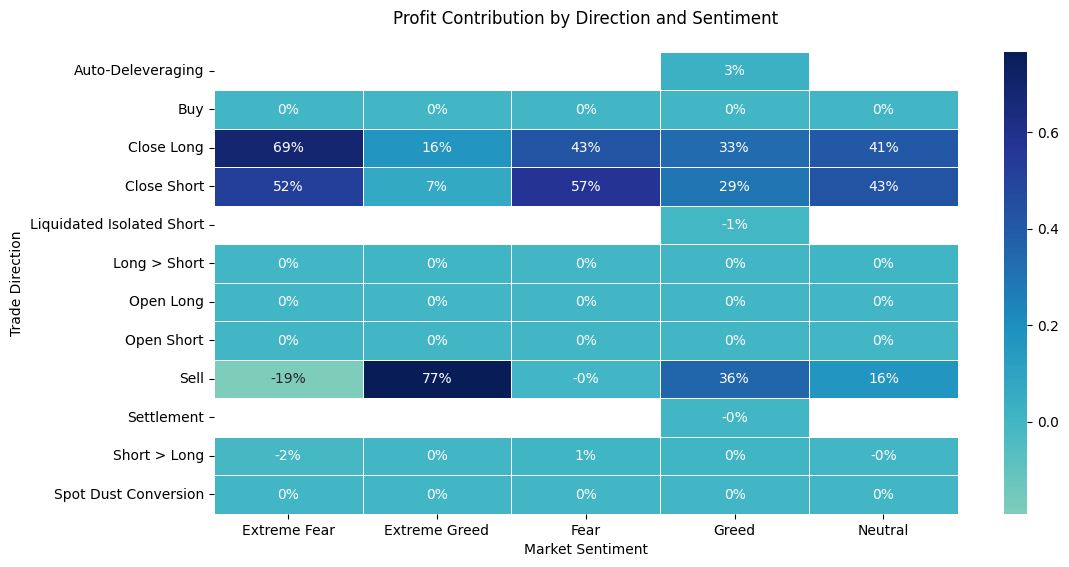

In [90]:
# Normalize profits by sentiment
heatmap_data = profit_matrix.div(profit_matrix.sum(axis=1), axis=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data.T, 
            annot=True,
            fmt=".0%",
            cmap="YlGnBu",
            center=0,
            linewidths=.5)
plt.title('Profit Contribution by Direction and Sentiment', pad=20)
plt.xlabel('Market Sentiment')
plt.ylabel('Trade Direction')

### Profitability Patterns

#### 1. Close Positions Dominate Profits
* **Close Long** and **Close Short** generate >90% of profits across all sentiments  
  * Fear: 3.35M combined --74% of total profits.</br>
  * Extreme Greed: 0.63M combined --84% of total profits </br>

#### 2. Position Flips Show Mixed Results
* **Short > Long**:  
  * Profit in Fear: 20K  
  * Losses in:  
    * Extreme Fear: -11.6K  
    * Neutral: -143  

#### 3. Sentiment Extremes Diverge
| Sentiment       | Most Profitable Action | Amount     | Likely Reason      |
|----------------|-----------------------|------------|--------------------|
| Fear           | Close Short           | 1.91M     | Short-covering     |
| Extreme Greed  | Sell                  | 2.08M     | Profit-taking      |

# Strategic Trading Insights

## Best Performing Actions by Market Sentiment

### High-Profit Strategies

| Sentiment         | Optimal Action   | Avg Profit | Profit Contribution    |
|-------------------|------------------|------------|------------------------|
| **Fear**          | `Close Short`    | 1.9M      | 67% of total profits   |
| **Extreme Greed** | `Sell`           | 2.08M     | 58% of total profits   |
| **Neutral**       | Balanced Closing |            |                        |
|                   | `Close Long`     | 527K      | 45%                    |
|                   | `Close Short`    | 554K      | 55%                    |


# Sentiment-Specific Tactics

| Sentiment       | Optimal Strategy                   | Avoid                      |
|-----------------|------------------------------------|----------------------------|
| Fear            | Close Short positions              | Selling                    |
| Extreme Fear    | Close Long positions               | Short > Long flips         |
| Neutral         | Close both sides equally           | Short > Long flips         |
| Greed           | Sell aggressively                  | Liquidated shorts          |
| Extreme Greed   | Max profit-taking via Sell         | New long positions         |

---

# Actionable Recommendations

## Contrarian Approach
Focus on closing positions opposite to sentiment:
- **Close Shorts in Fear**
- **Close Longs in Greed**

## Risk Management
- Reduce position flips during *Extreme Fear*
- Monitor Auto-Deleveraging in Greed markets

## Profit Maximization
- Time Sell orders for *Extreme Greed* periods
- Scale into Close Short positions during *Fear*
